
# Universidad de Buenos Aires
# Deep Learning - Examen - Parte 2
# Agosto 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el **Lunes 26 de agosto, 23:59hs**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” a cargar en el siguiente formulario de google: [link](https://docs.google.com/forms/d/e/1FAIpQLSdqvLFa--M6RXuXdg2E9gpvvwyrEbMiqhD6B7cn1ACqwTMc6g/viewform?usp=sf_link)



Recordar compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com así podemos acceder y corregir. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen ABRIL 2024.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.

## Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset CIFAR10, las clases `['cat', 'dog', 'frog']`. Entrene solamente usando las clases mencionadas (ver dataset de ejemplo).

Sobre dicho modelo, evalue el comportamiento de la accuracy bajo los siguientes tamaños de `kernel_size = [5, 7, 9, 11]`.

Grafique la evolución de la función de perdida y la accuracy (para train y test) para cada modelo y elija el que considera mejor. En caso de encontrar overfitting, tome las medidas adecuadas.





In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader

100%|██████████| 170498071/170498071 [00:03<00:00, 43494791.25it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


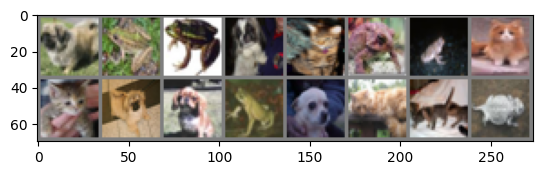

In [2]:
class FilteredDataset(Dataset):
    def __init__(self, original_dataset, selected_labels):
        self.original_dataset = original_dataset
        self.selected_labels = selected_labels

        # Crear un diccionario para remapear las etiquetas seleccionadas a índices ascendentes
        self.label_map = {label: idx for idx, label in enumerate(selected_labels)}

        # Filtrar los índices de las imágenes que pertenecen a las clases seleccionadas
        self.indices = [i for i, label in enumerate(original_dataset.targets) if label in selected_labels]

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        # Obtener el índice del dataset original
        original_idx = self.indices[idx]

        # Obtener la imagen y la etiqueta correspondientes
        image, label = self.original_dataset[original_idx]

        # Remapear la etiqueta
        remapped_label = self.label_map[label]

        return image, remapped_label


# Definir transformaciones para las imágenes
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Descargar y cargar el conjunto de datos CIFAR-10
original_train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                download=True, transform=transform)

original_test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Elegir 3 clases específicas (por ejemplo: 'cat', 'dog', 'frog')
classes = original_train_dataset.classes
selected_classes = ['cat', 'dog', 'frog']
selected_class_indices = [classes.index(cls) for cls in selected_classes]

# Crear un nuevo conjunto de datos filtrado
filtered_train_dataset = FilteredDataset(original_train_dataset, selected_class_indices)
filtered_test_dataset = FilteredDataset(original_test_dataset, selected_class_indices)

# define tamaño de batch
batch_size = 16

# Crear un DataLoader para el nuevo conjunto de datos
trainloader = DataLoader(filtered_train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(filtered_test_dataset, batch_size=batch_size, shuffle=False)

# Función para mostrar imágenes
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener un lote de entrenamiento
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{selected_classes[labels[j]]}' for j in range(batch_size)))


## Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior, realice transfer learning para indentificar del mismo dataset CIFAR10 las clases `['plane', 'car']`.

Compare la evolución de la función de perdida y accuracy realizando transfer learning vs entrenando el modelo desde cero.


Compare los resultados finales y comente.

## <h1><center>TP2 - Aprendizaje profundo - CEIA</center></h1>

In [3]:
# Descargamos la carpeta con archivos auxiliares
%pip install gdown
!gdown https://drive.google.com/drive/folders/1UBZ8PEbtmiWMGkULu7GAt3VhUpeTy9l7?usp=sharing --folder

# Exportamos los requrimientos para reproducción local
%pip freeze > requirements.txt

dog frog frog dog cat frog frog cat cat dog dog frog dog cat cat frog
Retrieving folder contents
Processing file 1XtMUTaUiev8ZFsFcLWktAxM0kf665vFs Imagen1.png
Processing file 1CRPFyP2rK5JN5H1R-2I496XHOOzNCDpL portada.jpeg
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtMUTaUiev8ZFsFcLWktAxM0kf665vFs
To: /content/resources/Imagen1.png
100% 117k/117k [00:00<00:00, 3.80MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CRPFyP2rK5JN5H1R-2I496XHOOzNCDpL
To: /content/resources/portada.jpeg
100% 272k/272k [00:00<00:00, 3.93MB/s]
Download completed


<center>

<img src="https://drive.google.com/uc?id=1CRPFyP2rK5JN5H1R-2I496XHOOzNCDpL" width="600" alt="Figura 1: A data scientist playing with convolutional neural networks. - Generada con Microsoft Image Creator">

<small><em>Figura 1: A data scientist playing with convolutional neural networks. - Generada con Microsoft Image Creator</em></small>

</center>

<center>
<p>✨Datos del proyecto:✨<p>

| Subtitulo   | TP2 - Aprendizaje profundo - FIUBA                                                                                                     |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | CNN + Transfer Learning ⭐                          |
| **Integrantes** | Bruno Masoller (brunomaso1@gmail.com)|

</center>

In [57]:
# Importaciones
%pip install torchinfo
%pip install torchviz

from torchinfo import summary
from torchviz import make_dot # Para visualización de la red
from sklearn import metrics
from tqdm.auto import tqdm
from tqdm import trange
from torch.optim.lr_scheduler import ReduceLROnPlateau
import copy
from torchvision import models

🔧 <em><font color='tomato'><strong>Configuraciones:</strong></font></em>

In [5]:
# Parámetros
BATCH_SIZE = batch_size # Tamaño del batch
N_EPOCHS = 30 # Número de épocas
VERBOSE = True # Muestra época a época la evolución
EARLY_STOP_PATIENCE = 5 # Early stoping threeshold
TRIGGER_EARLY_STOP = True # Activar early stopping
OPTIMIZER_LR = 0.001
OPTIMIZER_WEIGHT_DECAY = 1e-4
SCHEDULER_FACTOR = 0.1
SCHEDULER_PATIENCE = 5
SCHEDULER_MODE = 'min'
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'Dispositivo actual: {DEVICE}')

Dispositivo actual: cuda


### Parte 2.A

> Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset CIFAR10, las clases `['cat', 'dog', 'frog']`. Entrene solamente usando las clases mencionadas (ver dataset de ejemplo).  
Sobre dicho modelo, evalue el comportamiento de la accuracy bajo los siguientes tamaños de `kernel_size = [5, 7, 9, 11]`.  
Grafique la evolución de la función de perdida y la accuracy (para train y test) para cada modelo y elija el que considera mejor. En caso de encontrar overfitting, tome las medidas adecuadas.

<em>
Como ya tenemos todas las transformaciones y descarga del conjunto, nuestro punto de partida es desde los Dataloaders.*

Entonces, para solucionar el problema, se plantea realizar los siguientes pasos:
1. Primeramente, crear la red neuronal convolucional. Esta red debe tener los kernels parametrizables, para probar cada caso.
2. Crear una función <code>fit</code> que permita entrenar un modelo, de tal manera que abstaiga las particularidades de dicho modelo (solamente se debe llamar a dicha función). Esta función también debe devolver los valores de "Accuracy" y "Train Error", así como también opcionalmente graficarlos.
3. Instanciar cada modelo para distintos tamaños de kernels y ejecutar dicha función.
4. Comparar los resultados.

</em>

<em>

Incialmente, creamos una red neuronal con el parámetro de tamaño del kernel parametrizable:

</em>

🔮 <em><font color='violet'><strong>Función auxiliar:</strong> Devuelve un bloque de convolución. Esto es una bloque predefinido con una capa de convolucón, una capa de activación y un pooling.</font></em>

In [6]:
def conv_block(c_in, c_out, k=7, p='same', s=1, pk=3, ps=2, pp=1, drop=0.0):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.Tanh(),
        torch.nn.MaxPool2d(pk, stride=ps, padding=pp),
        torch.nn.Dropout(drop) if drop > 0 else torch.nn.Identity()
    )

🔮 <em><font color='violet'><strong>Función auxiliar:</strong> Permite calcular las dimensiones de la capa "fully conected" de forma automática.</font></em>

In [7]:
def calculate_conv_output_dim(model, h, w):
    def _get_output_dim(layer, h, w):
        if isinstance(layer, torch.nn.Conv2d):
            padding = layer.padding
            if isinstance(padding, str) and padding == 'same':
                padding_h = (layer.kernel_size[0] - 1) // 2
                padding_w = (layer.kernel_size[1] - 1) // 2
            else:
                padding_h, padding_w = layer.padding

            h = (h - layer.kernel_size[0] + 2 * padding_h) // layer.stride[0] + 1
            w = (w - layer.kernel_size[1] + 2 * padding_w) // layer.stride[1] + 1

        elif isinstance(layer, torch.nn.MaxPool2d):
            padding = layer.padding
            if isinstance(padding, str) and padding == 'same':
                padding_h = (layer.kernel_size - 1) // 2
                padding_w = (layer.kernel_size - 1) // 2
            else:
                padding_h = padding_w = layer.padding

            h = (h - layer.kernel_size + 2 * padding_h) // layer.stride + 1
            w = (w - layer.kernel_size + 2 * padding_w) // layer.stride + 1

        elif isinstance(layer, torch.nn.Sequential) or isinstance(layer, torch.nn.ModuleList):
            for sub_layer in layer:
                h, w = _get_output_dim(sub_layer, h, w)

        return h, w

    h, w = _get_output_dim(model.conv_layers, h, w)
    return h * w * model.last_filter_size

*Clase que especifica la red neuronal:*

In [38]:
class ConvNet(torch.nn.Module):
    def __init__(self, num_clases, kernel_size, input_height, input_width):
        super(ConvNet, self).__init__()
        self.last_filter_size = 64
        self.num_clases = num_clases
        self.kernel_size = kernel_size
        self.input_height = input_height
        self.input_width = input_width

        # Definir la arquitectura de las capas convolucionales
        self.conv_layers = torch.nn.Sequential(
            conv_block(3, 8, k=self.kernel_size),
            conv_block(8, 16, k=self.kernel_size),
            conv_block(16, 32, k=self.kernel_size),
            conv_block(32, self.last_filter_size, k=self.kernel_size, drop=0.5),
        )

        # Calcular la dimensión de salida después de todas las capas convolucionales
        self.input_dim = calculate_conv_output_dim(self, self.input_height, self.input_width)

        # Definir las capas de clasificación
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(self.input_dim, 256),
            torch.nn.Tanh(),
            torch.nn.Linear(256, self.num_clases)
        )

    def forward(self, x):
        # Pasar a través de las capas convolucionales
        x = self.conv_layers(x)
        # Pasar a través de las capas lineales
        # Logits
        x = self.fc_layers(x)
        # Proba
        # x = torch.softmax(x, dim=1)
        return x

*Creamos los modelos y visualizamos una red (se puede generalizar para todos los casos):*

In [9]:
model_k5 = ConvNet(num_clases=3, kernel_size=5, input_height=32, input_width=32).to(DEVICE)
model_k7 = ConvNet(num_clases=3, kernel_size=7, input_height=32, input_width=32).to(DEVICE)
model_k9 = ConvNet(num_clases=3, kernel_size=9, input_height=32, input_width=32).to(DEVICE)
model_k11 = ConvNet(num_clases=3, kernel_size=11, input_height=32, input_width=32).to(DEVICE)
print(model_k5)

ConvNet(
  (conv_layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): Tanh()
      (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (3): Identity()
    )
    (1): Sequential(
      (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): Tanh()
      (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (3): Identity()
    )
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): Tanh()
      (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (3): Identity()
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): Tanh()
      (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (3): Dropout(p=0.5, inplace=False)
    )
  )
  (fc_layers): Sequential(
   

*Utilizamos `torchinfo` para una visualización en profundidad:*

In [10]:
summary(model_k5, input_size=(1, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
ConvNet                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 64, 2, 2]             --
│    └─Sequential: 2-1                   [1, 8, 16, 16]            --
│    │    └─Conv2d: 3-1                  [1, 8, 32, 32]            608
│    │    └─Tanh: 3-2                    [1, 8, 32, 32]            --
│    │    └─MaxPool2d: 3-3               [1, 8, 16, 16]            --
│    │    └─Identity: 3-4                [1, 8, 16, 16]            --
│    └─Sequential: 2-2                   [1, 16, 8, 8]             --
│    │    └─Conv2d: 3-5                  [1, 16, 16, 16]           3,216
│    │    └─Tanh: 3-6                    [1, 16, 16, 16]           --
│    │    └─MaxPool2d: 3-7               [1, 16, 8, 8]             --
│    │    └─Identity: 3-8                [1, 16, 8, 8]             --
│    └─Sequential: 2-3                   [1, 32, 4, 4]             --
│    │    └

*Mostramos la red de forma visual:*

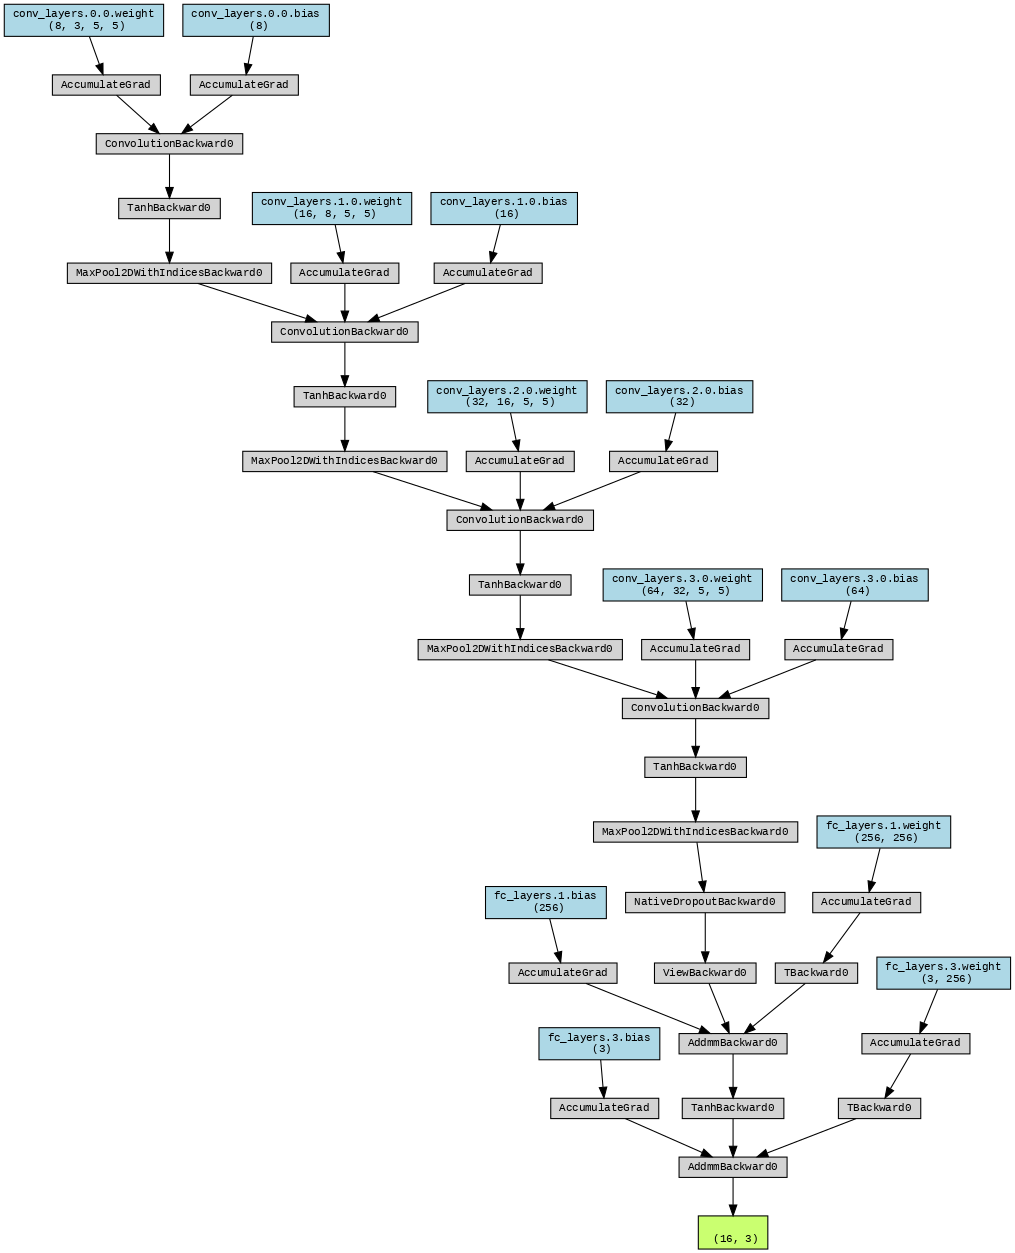

In [11]:
images, _ = next(dataiter)
images = images.to(DEVICE)
yhat = model_k5(images) # Give dummy batch to forward().

make_dot(yhat, params=dict(list(model_k5.named_parameters()))).render("model_k5_torchviz", format="png")

# Mostramos la imagen generada por torchviz
from IPython.display import Image
Image(filename='model_k5_torchviz.png')

*Una vez teminda la definición de la arquitectura, se crea una función `fit` que se utilizará para entrenar el modelo:*

🔮 <em><font color='violet'><strong>Función auxiliar:</strong> Realizar el entrenamiento de un modelo para una época.</font></em>

In [12]:
def train(model, dataloader, optimizer, criterion):
    model.to(DEVICE)

    train_loss = 0.0
    train_y = []
    train_y_hat = []

    model.train()
    if VERBOSE:
        dataloader = tqdm(dataloader, desc='Training', unit='batch', leave=False)
    for i, (X_batch, y_batch) in enumerate(dataloader):
        X_batch = X_batch.to(DEVICE).float()
        y_batch = y_batch.to(DEVICE)

        optimizer.zero_grad()

        y_batch_hat = model(X_batch)

        loss = criterion(y_batch_hat, y_batch)
        loss.backward()
        optimizer.step()

        train_y += list(y_batch.detach().cpu().numpy())
        train_y_hat += list(y_batch_hat.detach().cpu().numpy())

        train_loss += loss.item()

    train_loss /= len(dataloader)
    return train_loss, train_y, train_y_hat

🔮 <em><font color='violet'><strong>Función auxiliar:</strong> Realiza la validación de un modelo para una época.</font></em>

In [13]:
def validate(model, dataloader, criterion):
    model.to(DEVICE)

    test_loss = 0.0
    test_y = []
    test_y_hat = []

    model.eval()
    if VERBOSE:
        dataloader = tqdm(dataloader, desc='Validation', unit='batch', leave=False)
    with torch.no_grad():
        for (X_batch, y_batch) in dataloader:
            X_batch = X_batch.to(DEVICE).float()
            y_batch = y_batch.to(DEVICE)

            y_batch_hat = model(X_batch)
            loss = criterion(y_batch_hat, y_batch)

            test_y += list(y_batch.detach().cpu().numpy())
            test_y_hat += list(y_batch_hat.detach().cpu().numpy())
            test_loss += loss.item()

    test_loss /= len(dataloader)
    return test_loss, test_y, test_y_hat

*Definimos la función `fit`:*

In [14]:
def fit(model, trainloader, testloader, optimizer, criterion, scheduler=None, early_stopping=TRIGGER_EARLY_STOP, epochs=N_EPOCHS):
    print('Training...\n')
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    # Early stopping parms
    best_test_loss = float('inf')
    trigger_times = 0

    if VERBOSE:
        pbar = trange(epochs, desc='Epoch', unit='epoch', colour='green')
    else:
        pbar = range(epochs)

    for epoch in pbar:
        train_loss, train_y, train_y_hat = train(model, trainloader, optimizer, criterion)
        test_loss, test_y, test_y_hat = validate(model, testloader, criterion)

        if scheduler: scheduler.step(test_loss)

        # Convertir los logits en predicciones de clase para calcular las métricas
        train_y_pred = [np.argmax(logit) for logit in train_y_hat]
        test_y_pred = [np.argmax(logit) for logit in test_y_hat]

        train_acc = metrics.accuracy_score(train_y, train_y_pred)
        test_acc = metrics.accuracy_score(test_y, test_y_pred)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        if VERBOSE:
            data = {
                'Train Loss': format(train_loss, '.3f'),
                'Test Loss': format(test_loss, '.3f'),
                'Train Accuracy': format(train_acc, '.3f'),
                'Test Accuracy': format(test_acc, '.3f')
            }
            pbar.set_postfix(data)

        # Early stopping
        if early_stopping:
            if test_loss < best_test_loss:
                best_test_loss = test_loss
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= EARLY_STOP_PATIENCE:
                    print("\nEarly stopping triggered.")
                    break

    print('\n \nFinished Training')
    return train_losses, test_losses, train_accs, test_accs

🔮 <em><font color='violet'><strong>Función auxiliar:</strong> Grafica la exactitud y la pérdida para el entrenamiento y validación para un tipo de kernel size</font></em>

In [15]:
#Grafica la exactitud y la pérdida para el entrenamiento y validación en una grilla de 2 columnas.
def plot_results(train_losses, test_losses, train_accs, test_accs, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(train_losses, 'r')
    plt.plot(test_losses, 'g')
    plt.title('Loss')
    plt.legend(['train', 'test'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(122)
    plt.plot(train_accs, 'r')
    plt.plot(test_accs, 'g')
    plt.title('Accuracy')
    plt.legend(['train', 'test'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    plt.suptitle(title)
    plt.show()

🔮 <em><font color='violet'><strong>Función auxiliar:</strong> Grafica la exactitud y la pérdida para el entrenamiento y validación para todos los tipos de kernel size</font></em>

In [16]:
def plot_all_results(**kwargs):
    n_rows = len(kwargs)
    n_col = 2
    plt.figure(figsize=(10, 5 * n_rows))
    for i, kernel in enumerate(kwargs.items()):
        data = kernel[1]
        title = data['Title']
        train_losses = data['Train Loss']
        test_losses = data['Test Loss']
        train_accs = data['Train Accuracy']
        test_accs = data['Test Accuracy']

        plt.subplot(n_rows, n_col, i * n_col + 1)
        plt.plot(train_losses, 'r')
        plt.plot(test_losses, 'g')
        plt.title(f'Loss {title}')
        plt.legend(['train', 'test'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.subplot(n_rows, n_col, i * n_col + 2)
        plt.plot(train_accs, 'r')
        plt.plot(test_accs, 'g')
        plt.title(f'Accuracy {title}')
        plt.legend(['train', 'test'])
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')

    plt.show()

*Creamos una estructura para guardar las ejecuciones de todos los experimentos:*

In [17]:
results = {}

#### Kernel 5x5

*Entrenamos el modelo que tiene un tamaño de kernel de 5:*

In [18]:
%%time
optimizer = torch.optim.Adam(model_k5.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_k5, trainloader, testloader, optimizer, criterion, scheduler)

results.update({
    'Kernel5_results': {
        'Title': 'Kernel 5x5',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:09<04:24,  9.12s/epoch, Train Loss=0.841, Test Loss=0.754, Train Accuracy=0.589, Test Accuracy=0.623]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:17<03:59,  8.55s/epoch, Train Loss=0.723, Test Loss=0.813, Train Accuracy=0.669, Test Accuracy=0.632]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:25<03:45,  8.35s/epoch, Train Loss=0.676, Test Loss=0.654, Train Accuracy=0.699, Test Accuracy=0.712]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:33<03:35,  8.28s/epoch, Train Loss=0.623, Test Loss=0.620, Train Accuracy=0.728, Test Accuracy=0.722]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [00:41<03:24,  8.18s/epoch, Train Loss=0.573, Test Loss=0.630, Train Accuracy=0.758, Test Accuracy=0.722]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [00:49<03:15,  8.14s/epoch, Train Loss=0.537, Test Loss=0.568, Train Accuracy=0.771, Test Accuracy=0.741]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [00:57<03:07,  8.15s/epoch, Train Loss=0.515, Test Loss=0.581, Train Accuracy=0.782, Test Accuracy=0.748]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:05<02:58,  8.13s/epoch, Train Loss=0.478, Test Loss=0.587, Train Accuracy=0.801, Test Accuracy=0.760]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [01:13<02:50,  8.10s/epoch, Train Loss=0.448, Test Loss=0.611, Train Accuracy=0.814, Test Accuracy=0.743]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [01:21<02:41,  8.08s/epoch, Train Loss=0.429, Test Loss=0.585, Train Accuracy=0.825, Test Accuracy=0.744]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [01:30<03:00,  9.01s/epoch, Train Loss=0.408, Test Loss=0.634, Train Accuracy=0.835, Test Accuracy=0.744]


Early stopping triggered.

 
Finished Training
CPU times: user 1min 28s, sys: 928 ms, total: 1min 29s
Wall time: 1min 30s


*Imprimimos la evolución de entrenamiento y validación:*

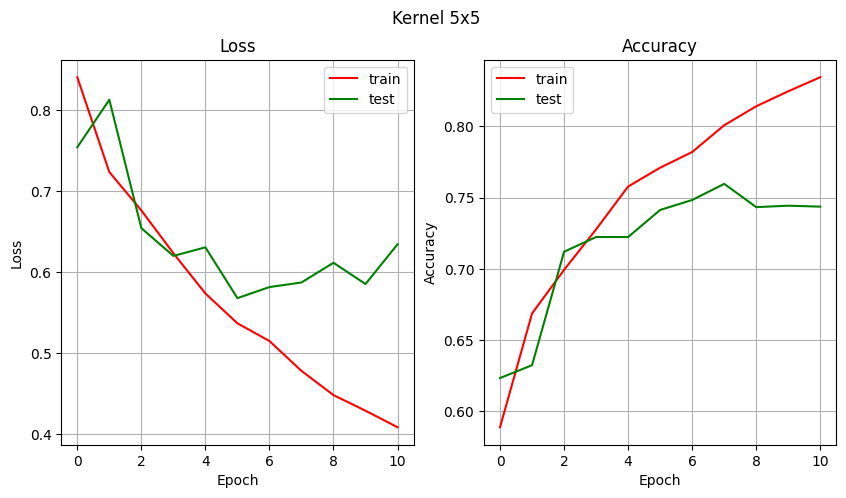

In [19]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Kernel 5x5')

#### Kernel 7x7

*Entrenamos el modelo que tiene un tamaño de kernel de 7:*

In [20]:
%%time
optimizer = torch.optim.Adam(model_k7.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_k7, trainloader, testloader, optimizer, criterion, scheduler)
results.update({
    'Kernel7_results': {
        'Title': 'Kernel 7x7',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:08<03:55,  8.12s/epoch, Train Loss=0.859, Test Loss=0.789, Train Accuracy=0.576, Test Accuracy=0.628]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:16<03:47,  8.14s/epoch, Train Loss=0.772, Test Loss=0.733, Train Accuracy=0.640, Test Accuracy=0.657]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:24<03:40,  8.18s/epoch, Train Loss=0.716, Test Loss=0.676, Train Accuracy=0.676, Test Accuracy=0.678]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:32<03:32,  8.18s/epoch, Train Loss=0.668, Test Loss=0.687, Train Accuracy=0.700, Test Accuracy=0.684]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [00:40<03:24,  8.19s/epoch, Train Loss=0.638, Test Loss=0.647, Train Accuracy=0.717, Test Accuracy=0.709]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [00:49<03:16,  8.20s/epoch, Train Loss=0.605, Test Loss=0.643, Train Accuracy=0.733, Test Accuracy=0.718]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [00:57<03:09,  8.24s/epoch, Train Loss=0.566, Test Loss=0.623, Train Accuracy=0.754, Test Accuracy=0.724]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:05<03:00,  8.20s/epoch, Train Loss=0.530, Test Loss=0.653, Train Accuracy=0.776, Test Accuracy=0.726]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [01:13<02:52,  8.20s/epoch, Train Loss=0.507, Test Loss=0.618, Train Accuracy=0.784, Test Accuracy=0.737]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [01:21<02:44,  8.20s/epoch, Train Loss=0.486, Test Loss=0.650, Train Accuracy=0.796, Test Accuracy=0.714]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  37%|███▋      | 11/30 [01:30<02:35,  8.20s/epoch, Train Loss=0.460, Test Loss=0.622, Train Accuracy=0.811, Test Accuracy=0.739]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [01:38<02:28,  8.24s/epoch, Train Loss=0.430, Test Loss=0.704, Train Accuracy=0.823, Test Accuracy=0.716]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  43%|████▎     | 13/30 [01:46<02:19,  8.23s/epoch, Train Loss=0.413, Test Loss=0.744, Train Accuracy=0.831, Test Accuracy=0.702]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  43%|████▎     | 13/30 [01:55<02:30,  8.85s/epoch, Train Loss=0.392, Test Loss=0.707, Train Accuracy=0.841, Test Accuracy=0.708]


Early stopping triggered.

 
Finished Training
CPU times: user 1min 54s, sys: 961 ms, total: 1min 55s
Wall time: 1min 55s


*Imprimimos la evolución de entrenamiento y validación:*

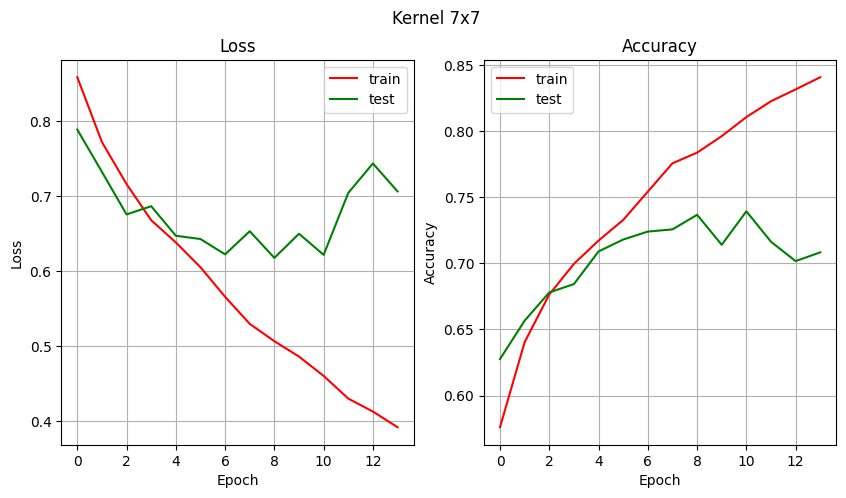

In [21]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Kernel 7x7')

#### Kernel 9x9

*Entrenamos el modelo que tiene un tamaño de kernel de 9:*

In [22]:
%%time
optimizer = torch.optim.Adam(model_k9.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_k9, trainloader, testloader, optimizer, criterion, scheduler)

results.update({
    'Kernel9_results': {
        'Title': 'Kernel 9x9',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:08<03:58,  8.22s/epoch, Train Loss=0.889, Test Loss=0.752, Train Accuracy=0.561, Test Accuracy=0.650]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:16<03:49,  8.20s/epoch, Train Loss=0.786, Test Loss=0.769, Train Accuracy=0.634, Test Accuracy=0.647]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:24<03:40,  8.18s/epoch, Train Loss=0.732, Test Loss=0.731, Train Accuracy=0.667, Test Accuracy=0.642]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:32<03:32,  8.17s/epoch, Train Loss=0.697, Test Loss=0.715, Train Accuracy=0.684, Test Accuracy=0.662]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [00:41<03:25,  8.23s/epoch, Train Loss=0.664, Test Loss=0.705, Train Accuracy=0.702, Test Accuracy=0.675]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [00:49<03:17,  8.24s/epoch, Train Loss=0.628, Test Loss=0.674, Train Accuracy=0.721, Test Accuracy=0.695]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [00:57<03:09,  8.25s/epoch, Train Loss=0.604, Test Loss=0.652, Train Accuracy=0.737, Test Accuracy=0.713]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:05<03:00,  8.22s/epoch, Train Loss=0.572, Test Loss=0.693, Train Accuracy=0.755, Test Accuracy=0.697]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [01:13<02:52,  8.20s/epoch, Train Loss=0.553, Test Loss=0.640, Train Accuracy=0.763, Test Accuracy=0.717]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [01:22<02:44,  8.21s/epoch, Train Loss=0.518, Test Loss=0.645, Train Accuracy=0.780, Test Accuracy=0.712]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  37%|███▋      | 11/30 [01:30<02:35,  8.20s/epoch, Train Loss=0.494, Test Loss=0.638, Train Accuracy=0.792, Test Accuracy=0.727]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [01:38<02:27,  8.20s/epoch, Train Loss=0.480, Test Loss=0.677, Train Accuracy=0.801, Test Accuracy=0.713]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  43%|████▎     | 13/30 [01:46<02:19,  8.20s/epoch, Train Loss=0.461, Test Loss=0.794, Train Accuracy=0.809, Test Accuracy=0.672]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  47%|████▋     | 14/30 [01:54<02:10,  8.18s/epoch, Train Loss=0.440, Test Loss=0.712, Train Accuracy=0.819, Test Accuracy=0.713]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  50%|█████     | 15/30 [02:03<02:02,  8.18s/epoch, Train Loss=0.421, Test Loss=0.744, Train Accuracy=0.828, Test Accuracy=0.698]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  50%|█████     | 15/30 [02:11<02:11,  8.75s/epoch, Train Loss=0.392, Test Loss=0.768, Train Accuracy=0.844, Test Accuracy=0.718]


Early stopping triggered.

 
Finished Training
CPU times: user 2min 10s, sys: 1.13 s, total: 2min 11s
Wall time: 2min 11s


*Imprimimos la evolución de entrenamiento y validación:*

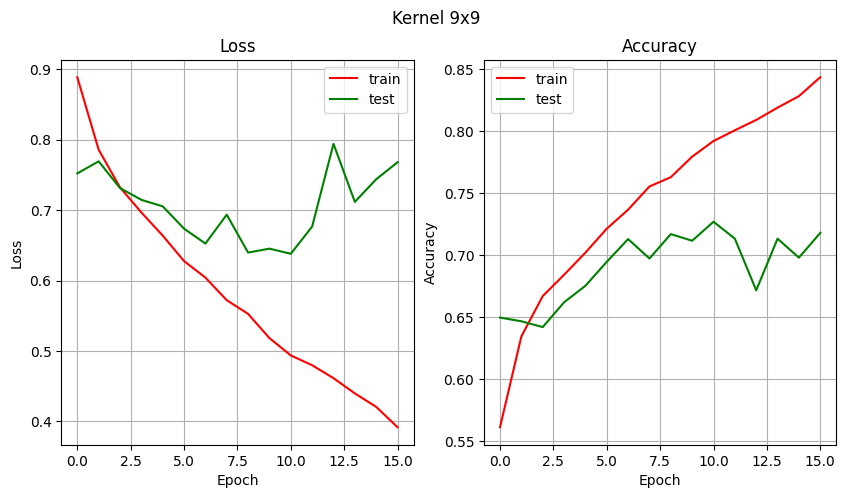

In [23]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Kernel 9x9')

#### Kernel 11x11

*Entrenamos el modelo que tiene un tamaño de kernel de 11:*

In [24]:
%%time
optimizer = torch.optim.Adam(model_k11.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_k11, trainloader, testloader, optimizer, criterion, scheduler)

results.update({
    'Kernel11_results': {
        'Title': 'Kernel 11x11',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:08<03:58,  8.23s/epoch, Train Loss=0.919, Test Loss=0.870, Train Accuracy=0.544, Test Accuracy=0.580]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:16<03:48,  8.15s/epoch, Train Loss=0.825, Test Loss=0.781, Train Accuracy=0.604, Test Accuracy=0.631]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:24<03:42,  8.23s/epoch, Train Loss=0.779, Test Loss=0.743, Train Accuracy=0.634, Test Accuracy=0.653]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:33<03:38,  8.39s/epoch, Train Loss=0.739, Test Loss=0.817, Train Accuracy=0.654, Test Accuracy=0.617]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [00:41<03:29,  8.38s/epoch, Train Loss=0.717, Test Loss=0.691, Train Accuracy=0.669, Test Accuracy=0.684]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [00:49<03:20,  8.34s/epoch, Train Loss=0.695, Test Loss=0.690, Train Accuracy=0.684, Test Accuracy=0.686]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [00:58<03:11,  8.34s/epoch, Train Loss=0.661, Test Loss=0.692, Train Accuracy=0.704, Test Accuracy=0.669]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:06<03:02,  8.31s/epoch, Train Loss=0.644, Test Loss=0.670, Train Accuracy=0.715, Test Accuracy=0.700]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [01:14<02:54,  8.30s/epoch, Train Loss=0.625, Test Loss=0.796, Train Accuracy=0.721, Test Accuracy=0.661]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [01:23<02:45,  8.30s/epoch, Train Loss=0.604, Test Loss=0.659, Train Accuracy=0.733, Test Accuracy=0.714]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  37%|███▋      | 11/30 [01:31<02:37,  8.30s/epoch, Train Loss=0.592, Test Loss=0.744, Train Accuracy=0.741, Test Accuracy=0.682]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [01:39<02:29,  8.29s/epoch, Train Loss=0.567, Test Loss=0.676, Train Accuracy=0.753, Test Accuracy=0.701]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  43%|████▎     | 13/30 [01:47<02:20,  8.25s/epoch, Train Loss=0.557, Test Loss=0.668, Train Accuracy=0.762, Test Accuracy=0.698]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  47%|████▋     | 14/30 [01:56<02:11,  8.24s/epoch, Train Loss=0.534, Test Loss=0.680, Train Accuracy=0.772, Test Accuracy=0.705]

Training:   0%|          | 0/938 [00:00<?, ?batch/s]

Validation:   0%|          | 0/188 [00:00<?, ?batch/s]

Epoch:  47%|████▋     | 14/30 [02:04<02:22,  8.88s/epoch, Train Loss=0.520, Test Loss=0.708, Train Accuracy=0.780, Test Accuracy=0.692]


Early stopping triggered.

 
Finished Training
CPU times: user 2min 3s, sys: 1.05 s, total: 2min 4s
Wall time: 2min 4s


*Imprimimos la evolución de entrenamiento y validación:*

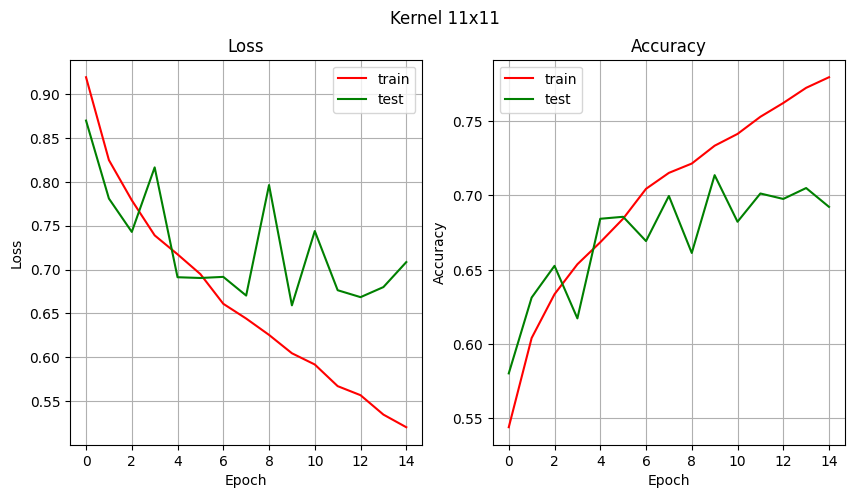

In [25]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Kernel 11x11')

#### Conclusión

<em>

El tamaño del kernel tiene influencia en la exactitud de la clasificación, pero depende del tamaño de la imagen ([paper](https://ieeexplore.ieee.org/document/9440284)).

También sabemos de Visión por Computadora 1 que:
1. Campo receptivo: El tamaño del kernel determina el área de la imagen de entrada que una neurona puede ver (campo receptivo). Un kernel más grande puede capturar características más globales de la imagen, mientras que un kernel más pequeño capturará características más locales.
    - Kernel pequeño (por ejemplo, 3x3 o 5x5): Detecta detalles más finos, como bordes y texturas.
    - Kernel grande (por ejemplo, 7x7 o 11x11): Captura características más globales, como formas y patrones más complejos.

2. Rendimiento computacional: El tamaño del kernel también afecta el rendimiento computacional.
    - Kernels más grandes: Tienen más parámetros y, por lo tanto, requieren más operaciones para cada pasada hacia adelante y hacia atrás, lo que puede aumentar el tiempo de entrenamiento.
    - Kernels más pequeños: Son más eficientes en términos de cómputo, pero pueden requerir más capas para capturar características globales.

Por lo que el tamaño de la imagen de entrada también influye en la elección del tamaño de kernel. En imágenes más grandes, puede ser beneficioso usar kernels más grandes en las primeras capas para capturar patrones más globales rápidamente. En la práctica, arquitecturas modernas como ResNet y VGG suelen usar kernels pequeños (como 3x3) de manera eficiente en redes profundas.

Como hipótesis, dado que CIFAR10 tiene imágenes de 32x32, se espera que kernels más pequeños brinden mejor rendimiento computacional y exactitud.

</em>

*Mostramos todos los resultados juntos:*

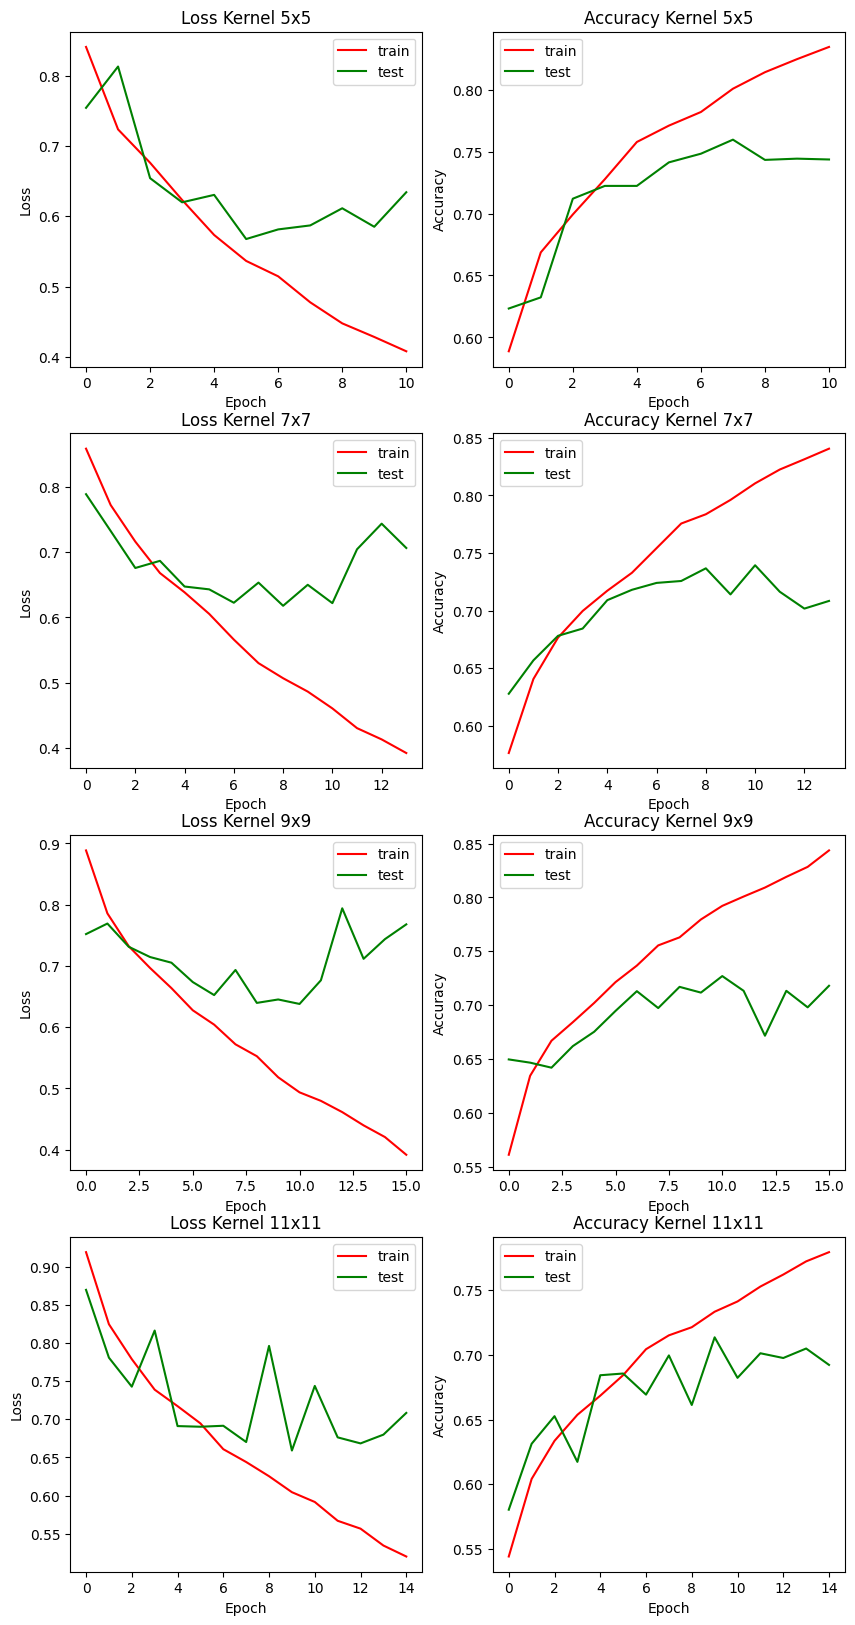

In [26]:
plot_all_results(**results)

⭐**Conclusión**⭐

*Como conclusión final, para este caso podemos ver que se cumple la hipótesis hasta cierto punto. Los modelos con kernels más chicos, especialmente el de 5x5 obtiene mejor resultado. También en todos los casos se activó el "EARLY STOPPING", por lo que lso modelos sufrieron de una de las peores enfermedades (overfiting 😂)*

<font color='MediumSeaGreen'>✔</font> *Mejoras posibles:* <font color='MediumSeaGreen'>✔</font>

*Como mejoras futuras, se pueden aplicar las mejoras propuestas para el TP1 que también sufrió de overfitting. En este caso, se aplicaron algunas mejoras, como el de utilizar un Schelduer, que ajusta la tasa de aprendizaje del optimizador a lo largo del entrenamiento.*

<font color='orange'>⚠</font> *Problemas detectados:* <font color='orange'>⚠</font>

*Se evidenció que las redes con mayores kernels demoran más en entrenar (dado que es la misma arquitectura para todos los modelos, solamente el tamaño del kernel es lo que cambió). En la red de kernel 5x5, se demoró 1.48 minutos, mientras en las demás, todas demoraron más de 2 minutos.*

### Parte 2.B

> Empleando el modelo entrenado y elegido por Ud. en el punto anterior, realice transfer learning para indentificar del mismo dataset CIFAR10 las clases `['plane', 'car']`.  
Compare la evolución de la función de perdida y accuracy realizando transfer learning vs entrenando el modelo desde cero.  
Compare los resultados finales y comente.

*Para esta parte, inicialmente cambiamos los dataloaders anterirores para incluir las clases faltantes:*

In [27]:
classes = original_train_dataset.classes
selected_classes = ['cat', 'dog', 'frog', 'airplane', 'automobile']
selected_class_indices = [classes.index(cls) for cls in selected_classes]

# Crear un nuevo conjunto de datos filtrado
filtered_train_dataset = FilteredDataset(original_train_dataset, selected_class_indices)
filtered_test_dataset = FilteredDataset(original_test_dataset, selected_class_indices)

# define tamaño de batch
batch_size = 16

# Crear un DataLoader para el nuevo conjunto de datos
trainloader = DataLoader(filtered_train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(filtered_test_dataset, batch_size=batch_size, shuffle=False)

In [42]:
results = {}

#### Entrenamiento modelo desde cero

*Realizamos el entrenamiento del modelo desde 0 (el único parámetro que cambia son la cantidad de clases, ya que este modelo debe predecir 5 clases y no 3). Primeramente instanciamos el modelo:*

In [43]:
model_from_0 = ConvNet(num_clases=5, kernel_size=5, input_height=32, input_width=32).to(DEVICE)

*Entrenamos el modelo:*

In [44]:
%%time
optimizer = torch.optim.Adam(model_from_0.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_from_0, trainloader, testloader, optimizer, criterion, scheduler)

results.update({
    'model_from_0': {
        'Title': 'Modelo desde cero',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:13<06:38, 13.73s/epoch, Train Loss=0.915, Test Loss=0.704, Train Accuracy=0.622, Test Accuracy=0.715]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:27<06:22, 13.67s/epoch, Train Loss=0.707, Test Loss=0.658, Train Accuracy=0.717, Test Accuracy=0.743]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:41<06:09, 13.67s/epoch, Train Loss=0.636, Test Loss=0.586, Train Accuracy=0.747, Test Accuracy=0.770]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:54<05:54, 13.63s/epoch, Train Loss=0.576, Test Loss=0.599, Train Accuracy=0.774, Test Accuracy=0.769]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [01:08<05:40, 13.63s/epoch, Train Loss=0.548, Test Loss=0.537, Train Accuracy=0.782, Test Accuracy=0.793]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [01:21<05:27, 13.64s/epoch, Train Loss=0.514, Test Loss=0.552, Train Accuracy=0.800, Test Accuracy=0.785]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [01:35<05:13, 13.64s/epoch, Train Loss=0.490, Test Loss=0.549, Train Accuracy=0.811, Test Accuracy=0.788]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:49<04:59, 13.62s/epoch, Train Loss=0.467, Test Loss=0.554, Train Accuracy=0.818, Test Accuracy=0.797]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [02:02<04:46, 13.63s/epoch, Train Loss=0.453, Test Loss=0.537, Train Accuracy=0.826, Test Accuracy=0.802]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [02:16<04:33, 13.67s/epoch, Train Loss=0.433, Test Loss=0.539, Train Accuracy=0.833, Test Accuracy=0.801]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  37%|███▋      | 11/30 [02:30<04:20, 13.73s/epoch, Train Loss=0.419, Test Loss=0.564, Train Accuracy=0.840, Test Accuracy=0.795]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [02:44<04:07, 13.73s/epoch, Train Loss=0.407, Test Loss=0.570, Train Accuracy=0.844, Test Accuracy=0.793]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  43%|████▎     | 13/30 [02:57<03:52, 13.70s/epoch, Train Loss=0.400, Test Loss=0.535, Train Accuracy=0.845, Test Accuracy=0.808]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  47%|████▋     | 14/30 [03:11<03:39, 13.69s/epoch, Train Loss=0.379, Test Loss=0.512, Train Accuracy=0.854, Test Accuracy=0.815]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  50%|█████     | 15/30 [03:25<03:26, 13.75s/epoch, Train Loss=0.374, Test Loss=0.534, Train Accuracy=0.856, Test Accuracy=0.812]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  53%|█████▎    | 16/30 [03:39<03:12, 13.76s/epoch, Train Loss=0.371, Test Loss=0.551, Train Accuracy=0.859, Test Accuracy=0.803]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  57%|█████▋    | 17/30 [03:52<02:58, 13.72s/epoch, Train Loss=0.355, Test Loss=0.532, Train Accuracy=0.865, Test Accuracy=0.811]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  60%|██████    | 18/30 [04:06<02:44, 13.70s/epoch, Train Loss=0.352, Test Loss=0.593, Train Accuracy=0.864, Test Accuracy=0.802]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  60%|██████    | 18/30 [04:19<02:53, 14.44s/epoch, Train Loss=0.343, Test Loss=0.564, Train Accuracy=0.868, Test Accuracy=0.811]


Early stopping triggered.

 
Finished Training
CPU times: user 4min 18s, sys: 2.2 s, total: 4min 20s
Wall time: 4min 19s


*Mostramos los resultados:*

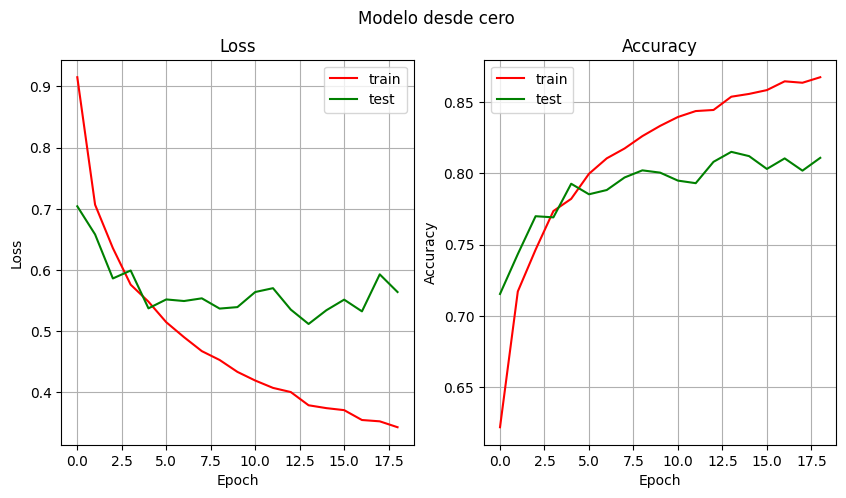

In [45]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Modelo desde cero')

#### Transfer learning (muchos datos)

<em>

Para la parte de "transfer learning", utilizamos la estrategia de <strong>fine tuning</strong>, dado que estamos en un caso en donde:
- Dataset semejante.
- Dataset grande (60000)

En los ejemplos vistos en clase, estaríamos en el cuadrante II.

Esto implica entrenar toda la red, sin embargo solamente cambiar una parte de la red (la parte final) para la tarea específica de identificar 5 clases en vez de 3.

</em>

<center>

<img src="https://drive.google.com/uc?id=1XtMUTaUiev8ZFsFcLWktAxM0kf665vFs" width="600" alt="Figura 2: Diagrama de entrenamiento de red para el caso de dataset semejante y dataset grande">

<small><em>Figura 2: Diagrama de entrenamiento de red para el caso de dataset semejante y dataset grande</em></small>

</center>

*Dado que ya sabemos que el último bloque de la red es un "fully conected", simplemente tenmos que cambiar la salida para que sean 5 clases en vez de 3:*

In [46]:
model_k5.fc_layers

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=256, out_features=256, bias=True)
  (2): Tanh()
  (3): Linear(in_features=256, out_features=3, bias=True)
)

*Copiamos el modelo para no arruinar el anterior:*

In [47]:
modek_k5_transfer = copy.deepcopy(model_k5)

*Con la linea anterior, pudimos acceder al útimo bloque sequiencial. En este punto simplemente hay que cambiar la útima capa:*

In [48]:
modek_k5_transfer.fc_layers[3] = torch.nn.Linear(in_features=256, out_features=5, bias=True)

*Finalmente, entrenamos todo el modelo nuevamente:*

In [49]:
%%time
optimizer = torch.optim.Adam(modek_k5_transfer.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(modek_k5_transfer, trainloader, testloader, optimizer, criterion, scheduler)

results.update({
    'modek_k5_transfer_shortdata': {
        'Title': 'Modelo pre-entrenado Fine Tuning',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:13<06:35, 13.64s/epoch, Train Loss=0.642, Test Loss=0.712, Train Accuracy=0.759, Test Accuracy=0.731]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:27<06:19, 13.57s/epoch, Train Loss=0.536, Test Loss=0.603, Train Accuracy=0.800, Test Accuracy=0.781]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:40<06:07, 13.61s/epoch, Train Loss=0.489, Test Loss=0.583, Train Accuracy=0.816, Test Accuracy=0.779]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:54<05:53, 13.59s/epoch, Train Loss=0.463, Test Loss=0.645, Train Accuracy=0.827, Test Accuracy=0.759]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [01:08<05:40, 13.61s/epoch, Train Loss=0.441, Test Loss=0.577, Train Accuracy=0.837, Test Accuracy=0.782]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [01:21<05:26, 13.60s/epoch, Train Loss=0.421, Test Loss=0.592, Train Accuracy=0.842, Test Accuracy=0.790]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [01:35<05:12, 13.61s/epoch, Train Loss=0.403, Test Loss=0.615, Train Accuracy=0.849, Test Accuracy=0.789]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:48<05:00, 13.64s/epoch, Train Loss=0.386, Test Loss=0.569, Train Accuracy=0.859, Test Accuracy=0.792]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [02:02<04:46, 13.65s/epoch, Train Loss=0.377, Test Loss=0.582, Train Accuracy=0.861, Test Accuracy=0.798]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [02:16<04:34, 13.72s/epoch, Train Loss=0.367, Test Loss=0.579, Train Accuracy=0.863, Test Accuracy=0.794]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  37%|███▋      | 11/30 [02:30<04:20, 13.72s/epoch, Train Loss=0.362, Test Loss=0.603, Train Accuracy=0.867, Test Accuracy=0.791]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [02:43<04:06, 13.70s/epoch, Train Loss=0.343, Test Loss=0.608, Train Accuracy=0.873, Test Accuracy=0.802]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [02:57<04:26, 14.80s/epoch, Train Loss=0.338, Test Loss=0.604, Train Accuracy=0.873, Test Accuracy=0.789]


Early stopping triggered.

 
Finished Training
CPU times: user 2min 56s, sys: 1.47 s, total: 2min 57s
Wall time: 2min 57s


*Mostramos los resultados:*

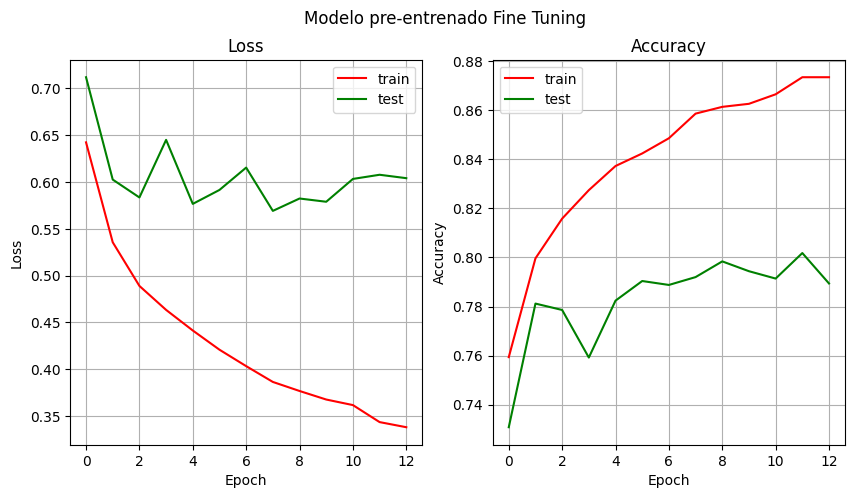

In [52]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Modelo pre-entrenado Fine Tuning')

#### Transfer learing (pocos datos)

*En este caso se asume que los datos son pocos, por lo que estaríamos en el primer cuadrante visto en clase (feature extractor):*

<center>

<img src="https://drive.google.com/uc?id=1kUb0Ntd7XA3U2628sGEgGoOvFI-xjlMg" width="600" alt="Figura 3: Diagrama de entrenamiento de red para el caso de dataset semejante y dataset pequeño">

<small><em>Figura 2: Diagrama de entrenamiento de red para el caso de dataset semejante y dataset pequeño</em></small>

</center>

*Realizamos el mismo proceso que anterior, pero con la diferencia que congelamos los gradientes para todas las capas menos la útlima:*

In [51]:
model_k5_transfer_big = copy.deepcopy(model_k5)

# Congelar todas las capas
for param in model_k5_transfer_big.parameters():
    param.requires_grad = False

# Modificar la última capa para ajustarla al nuevo número de clases
model_k5_transfer_big.fc_layers[3] = torch.nn.Linear(in_features=256, out_features=5, bias=True)

# Nos aseguramos de que la ultima capa sea entrenable, como dice el dicho: Más vale pecar de precavido que lamentar no haberlo sido...
for param in model_k5_transfer_big.fc_layers[3].parameters():
    param.requires_grad = True

*Realizamos el entrenamineto:*

In [53]:
%%time
optimizer = torch.optim.Adam(model_k5_transfer_big.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_k5_transfer_big, trainloader, testloader, optimizer, criterion, scheduler)

results.update({
    'model_k5_transfer_big': {
        'Title': 'Modelo pre-entrenado Feature Extractor',
        'Train Loss': train_losses,
        'Test Loss': test_losses,
        'Train Accuracy': train_accs,
        'Test Accuracy': test_accs
    }
})

Training...



Epoch:   0%|          | 0/30 [00:00<?, ?epoch/s]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   3%|▎         | 1/30 [00:11<05:38, 11.68s/epoch, Train Loss=0.931, Test Loss=1.003, Train Accuracy=0.626, Test Accuracy=0.618]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   7%|▋         | 2/30 [00:23<05:32, 11.89s/epoch, Train Loss=0.856, Test Loss=0.973, Train Accuracy=0.668, Test Accuracy=0.630]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  10%|█         | 3/30 [00:35<05:22, 11.94s/epoch, Train Loss=0.840, Test Loss=0.975, Train Accuracy=0.672, Test Accuracy=0.634]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  13%|█▎        | 4/30 [00:47<05:10, 11.93s/epoch, Train Loss=0.829, Test Loss=0.957, Train Accuracy=0.675, Test Accuracy=0.642]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  17%|█▋        | 5/30 [00:59<04:59, 11.96s/epoch, Train Loss=0.820, Test Loss=0.956, Train Accuracy=0.682, Test Accuracy=0.640]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  20%|██        | 6/30 [01:11<04:46, 11.94s/epoch, Train Loss=0.824, Test Loss=0.945, Train Accuracy=0.680, Test Accuracy=0.641]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  23%|██▎       | 7/30 [01:23<04:34, 11.92s/epoch, Train Loss=0.818, Test Loss=0.936, Train Accuracy=0.683, Test Accuracy=0.649]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  27%|██▋       | 8/30 [01:35<04:21, 11.87s/epoch, Train Loss=0.814, Test Loss=0.937, Train Accuracy=0.684, Test Accuracy=0.644]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  30%|███       | 9/30 [01:46<04:08, 11.84s/epoch, Train Loss=0.812, Test Loss=0.942, Train Accuracy=0.684, Test Accuracy=0.649]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  33%|███▎      | 10/30 [01:58<03:56, 11.81s/epoch, Train Loss=0.810, Test Loss=0.932, Train Accuracy=0.688, Test Accuracy=0.650]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  37%|███▋      | 11/30 [02:10<03:43, 11.78s/epoch, Train Loss=0.807, Test Loss=0.935, Train Accuracy=0.685, Test Accuracy=0.646]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  40%|████      | 12/30 [02:22<03:32, 11.79s/epoch, Train Loss=0.804, Test Loss=0.928, Train Accuracy=0.688, Test Accuracy=0.648]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  43%|████▎     | 13/30 [02:33<03:20, 11.78s/epoch, Train Loss=0.805, Test Loss=0.922, Train Accuracy=0.686, Test Accuracy=0.652]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  47%|████▋     | 14/30 [02:45<03:08, 11.77s/epoch, Train Loss=0.807, Test Loss=0.923, Train Accuracy=0.687, Test Accuracy=0.649]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  50%|█████     | 15/30 [02:57<02:56, 11.77s/epoch, Train Loss=0.806, Test Loss=0.932, Train Accuracy=0.685, Test Accuracy=0.654]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  53%|█████▎    | 16/30 [03:09<02:44, 11.76s/epoch, Train Loss=0.807, Test Loss=0.918, Train Accuracy=0.686, Test Accuracy=0.652]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  57%|█████▋    | 17/30 [03:20<02:32, 11.74s/epoch, Train Loss=0.804, Test Loss=0.919, Train Accuracy=0.688, Test Accuracy=0.654]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  60%|██████    | 18/30 [03:32<02:20, 11.74s/epoch, Train Loss=0.803, Test Loss=0.924, Train Accuracy=0.688, Test Accuracy=0.657]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  63%|██████▎   | 19/30 [03:44<02:09, 11.73s/epoch, Train Loss=0.797, Test Loss=0.913, Train Accuracy=0.693, Test Accuracy=0.661]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  67%|██████▋   | 20/30 [03:56<01:57, 11.78s/epoch, Train Loss=0.805, Test Loss=0.933, Train Accuracy=0.689, Test Accuracy=0.651]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  70%|███████   | 21/30 [04:08<01:46, 11.78s/epoch, Train Loss=0.799, Test Loss=0.942, Train Accuracy=0.690, Test Accuracy=0.654]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  73%|███████▎  | 22/30 [04:19<01:34, 11.80s/epoch, Train Loss=0.805, Test Loss=0.924, Train Accuracy=0.686, Test Accuracy=0.657]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  77%|███████▋  | 23/30 [04:31<01:22, 11.82s/epoch, Train Loss=0.801, Test Loss=0.914, Train Accuracy=0.692, Test Accuracy=0.659]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:  77%|███████▋  | 23/30 [04:43<01:26, 12.32s/epoch, Train Loss=0.804, Test Loss=0.922, Train Accuracy=0.690, Test Accuracy=0.654]


Early stopping triggered.

 
Finished Training
CPU times: user 4min 41s, sys: 2.4 s, total: 4min 44s
Wall time: 4min 43s


*Mostramos los resultados:*

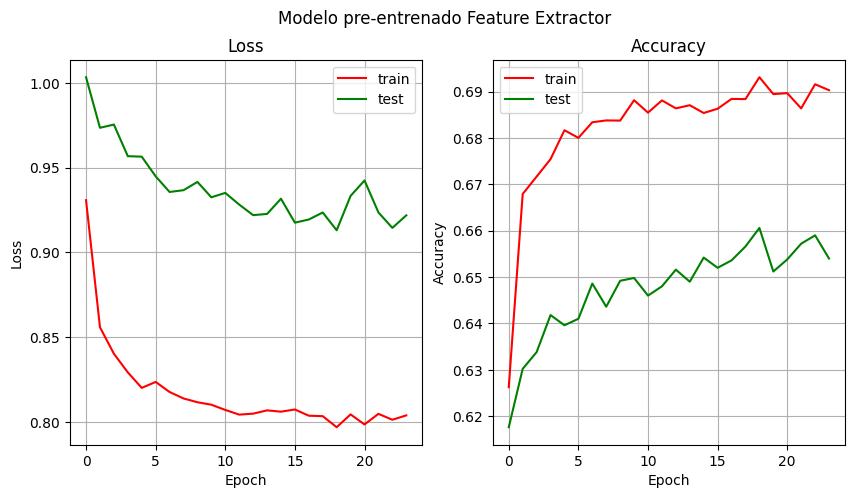

In [54]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'Modelo pre-entrenado Feature Extractor')

#### Conclusión

<em>

Como hiótesis, se tiene que el modelo con trasnfer learning tiene una mejor exactitud y converge más rápido para las nuevas clases.

</em>

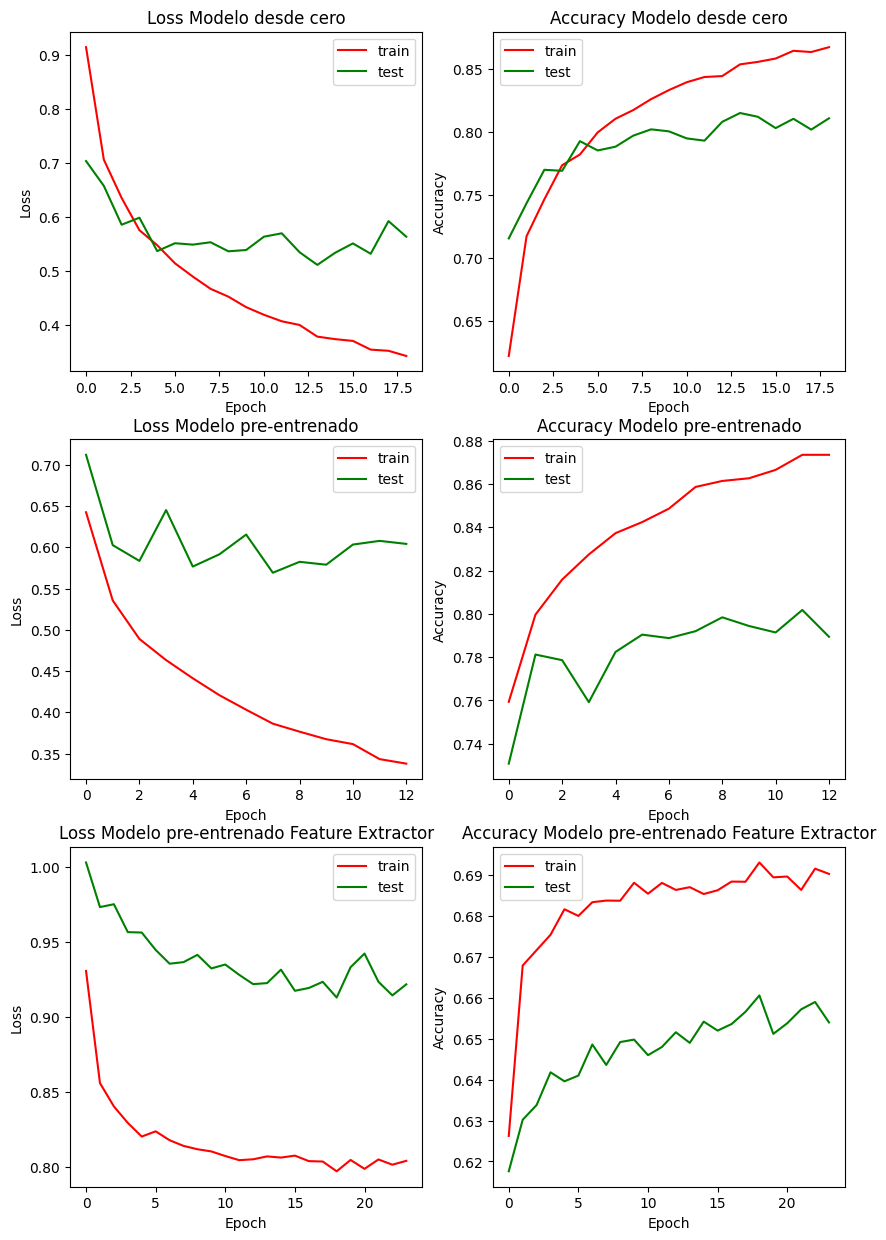

In [56]:
plot_all_results(**results)

⭐**Conclusión**⭐

*Para este caso sí se llegó a la misma exactitud con el modelo pre-entrenado (fine tuning) que el modelo entrenado de 0. Sin embargo, convergió más rápido al tope de los 0.8 que el modelo entrenado de 0.*

*El modelo de feature extractor dió cualquier cosa. Claramente para este caso no basta con congelar solamente la última capa, sino que habría que buscar un balance hasta que capa congelar. Igualmente, no se que tan costo-beneficio es encontrar dicho balance, dado que al final se "llegaría" al mismo modelo que fine tunning.*

*Como última conclusión, destacar el problema que tienen las redes neuronales con el overfitting y que habría que investigar más para resolver este problema común (se dió en ambos TPs)*

### Extra

#### Transfer learning EfficientNet (el chiquito)

<em>

En este experimento, probamos hacer transfer learning en una arquitectura de EfficientNet.

<small>https://pytorch.org/vision/stable/models/efficientnet.html</small>

Inicialmente cargamos el modelo (fue entrenado con imagenet):

</em>

In [84]:
model_ft = models.efficientnet.efficientnet_v2_s(weights='DEFAULT')

*Vemos una descripción de la RED:*

In [85]:
summary(model_ft)

Layer (type:depth-idx)                                  Param #
EfficientNet                                            --
├─Sequential: 1-1                                       --
│    └─Conv2dNormActivation: 2-1                        --
│    │    └─Conv2d: 3-1                                 648
│    │    └─BatchNorm2d: 3-2                            48
│    │    └─SiLU: 3-3                                   --
│    └─Sequential: 2-2                                  --
│    │    └─FusedMBConv: 3-4                            5,232
│    │    └─FusedMBConv: 3-5                            5,232
│    └─Sequential: 2-3                                  --
│    │    └─FusedMBConv: 3-6                            25,632
│    │    └─FusedMBConv: 3-7                            92,640
│    │    └─FusedMBConv: 3-8                            92,640
│    │    └─FusedMBConv: 3-9                            92,640
│    └─Sequential: 2-4                                  --
│    │    └─FusedMBConv: 3-1

*Observamos la útima capa para cambiar la salida:*

In [86]:
model_ft.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

*Cambiamos la ultima capa:*

In [87]:
model_ft.classifier[1] = torch.nn.Linear(in_features=1280, out_features=5, bias=True)

<em>

Vamos a utilizar el resto de GPU (que me queda) y hacer una estrategia de feature extractor (dado que imagenet son como 1.000.000 y el dataset que tenemos son 60.000, lo correcto sería feautre extractor). Para hacer feature extractor aplicamos el siguiente cambio (congelamos las capas internas y dejamos la ultima capa para que se entrene):

</em>

In [88]:
for parms in model_ft.parameters():
    parms.requires_grad = False

for parms in model_ft.classifier.parameters():
    parms.requires_grad = True

*Dejamos entrenando por 1000 épocas y le aumentamos el EARLY STOPPING a 20.
Entrenamos:*

In [ ]:
%%time
EARLY_STOP_PATIENCE = 20
optimizer = torch.optim.Adam(model_ft.parameters(), lr=OPTIMIZER_LR, weight_decay=OPTIMIZER_WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode=SCHEDULER_MODE, factor=SCHEDULER_FACTOR, patience=SCHEDULER_PATIENCE)
criterion = torch.nn.CrossEntropyLoss()

train_losses, test_losses, train_accs, test_accs = fit(model_ft, trainloader, testloader, optimizer, criterion, scheduler, epochs=1000)

Training...



Epoch:   0%|          | 0/1000 [00:00<?, ?epoch/s]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   0%|          | 1/1000 [01:02<17:26:54, 62.88s/epoch, Train Loss=1.594, Test Loss=9.333, Train Accuracy=0.300, Test Accuracy=0.408]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   0%|          | 2/1000 [02:05<17:21:48, 62.63s/epoch, Train Loss=1.590, Test Loss=17.254, Train Accuracy=0.323, Test Accuracy=0.443]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   0%|          | 3/1000 [03:07<17:16:47, 62.39s/epoch, Train Loss=1.595, Test Loss=13.859, Train Accuracy=0.319, Test Accuracy=0.445]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   0%|          | 4/1000 [04:09<17:15:21, 62.37s/epoch, Train Loss=1.601, Test Loss=14.021, Train Accuracy=0.318, Test Accuracy=0.404]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   0%|          | 5/1000 [05:11<17:11:31, 62.20s/epoch, Train Loss=1.591, Test Loss=14.119, Train Accuracy=0.320, Test Accuracy=0.435]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 6/1000 [06:14<17:11:08, 62.24s/epoch, Train Loss=1.593, Test Loss=3.945, Train Accuracy=0.324, Test Accuracy=0.420]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 7/1000 [07:15<17:07:25, 62.08s/epoch, Train Loss=1.587, Test Loss=8.670, Train Accuracy=0.327, Test Accuracy=0.438]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 8/1000 [08:17<17:03:39, 61.92s/epoch, Train Loss=1.596, Test Loss=4.509, Train Accuracy=0.320, Test Accuracy=0.438]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 9/1000 [09:18<17:00:23, 61.78s/epoch, Train Loss=1.587, Test Loss=26.137, Train Accuracy=0.329, Test Accuracy=0.429]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 10/1000 [10:20<16:58:34, 61.73s/epoch, Train Loss=1.603, Test Loss=5.899, Train Accuracy=0.317, Test Accuracy=0.430]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 11/1000 [11:21<16:56:19, 61.66s/epoch, Train Loss=1.588, Test Loss=85.898, Train Accuracy=0.321, Test Accuracy=0.426]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|          | 12/1000 [12:23<16:54:27, 61.61s/epoch, Train Loss=1.591, Test Loss=11.878, Train Accuracy=0.323, Test Accuracy=0.408]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|▏         | 13/1000 [13:25<16:53:26, 61.61s/epoch, Train Loss=1.537, Test Loss=16.433, Train Accuracy=0.332, Test Accuracy=0.435]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   1%|▏         | 14/1000 [14:26<16:49:35, 61.44s/epoch, Train Loss=1.530, Test Loss=8.871, Train Accuracy=0.332, Test Accuracy=0.455]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

Validation:   0%|          | 0/313 [00:00<?, ?batch/s]

Epoch:   2%|▏         | 15/1000 [15:27<16:49:35, 61.50s/epoch, Train Loss=1.517, Test Loss=11.716, Train Accuracy=0.337, Test Accuracy=0.450]

Training:   0%|          | 0/1563 [00:00<?, ?batch/s]

📝 *Nota:* 📝

1. Esto puede haber terminado o no... Posiblemente me quedé sin GPU y haya explotado...
2. También se que estoy intentando matar una hormiga con una bazooka, pero es para experimentar a ver que da...

In [ ]:
plot_results(train_losses, test_losses, train_accs, test_accs, 'efficientnet_v2_s')